In [1]:
#import the library that holds all the necessary functions
from pfss_notebook_lib import *
#import sys
#sys.path

# set the necessary variables for getting an hmi map

In [2]:
filepath="/home/chospa/solar_mach/pfss/"

email = "chospa@utu.fi"

carrington_rot = 2243

date = '2021/4/17'

#----User need not touch the function call-----------------------
hmimap = get_pfss_hmimap(filepath, email, carrington_rot, date)

Found pickled PFSS file


# settings for producing the logarithmic heliospheric map of objects and corresponding magnetic field lines tracing first back to the potential field source surface, and then down to photosphere

In [3]:
#names of the objects (optional)
names = None

#solar wind speeds at  the objects
sw = [125]

#distance to the objects in km
distance = au_to_km([1.2])

#carrington longitude of the objects
lon = [260.7]

#carrington latitude of the objects
lat = [3.7]

#title of the figure
title = "Example"

#produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = True
n_varies = 15

#boolean save switch
save = True

In [4]:
#names of the objects (optional)
names = ['Stereo A', 'SOHO', 'BepiColombo', 'PSP', 'SolO', 'Mars']

#solar wind speeds at  the objects
sw = [345, 550, 400, 400, 375, 345]

#distance to the objects in km
distance = au_to_km([0.966685164408638, 0.99279049374557, 0.630178489762197, 0.418940858451551, 0.843214100925785, 1.62995044866953])

#carrington longitude of the objects
lon = [260.775740934188, 314.556859144586, 180.524070529599, 104.561372910123, 216.072551543395, 224.562571327842]

#carrington latitude of the objects
lat = [-7.21191748218317, -5.4398280592112, 0.080361095504042, 3.76153510535719, 0.395639095125699, -3.14919334311625]

#title of the figure
title = date.replace('/','-')

#produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = False
n_varies = 5

#boolean save switch
save = True

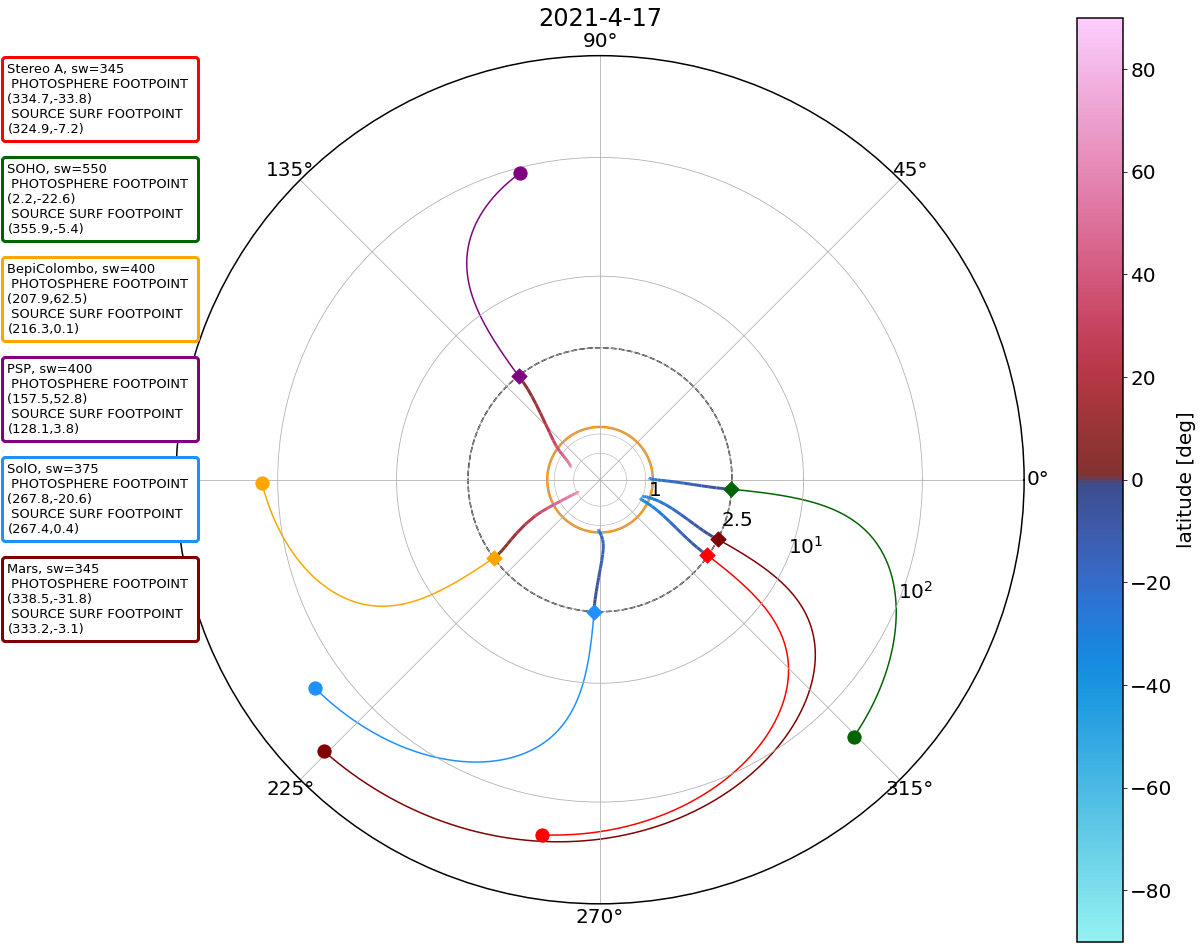

In [5]:
#No need to touch the function call; just run the cell
#----------------------------------------------------------
flines = symlog_pspiral(sw=sw, distance=distance, longitude=lon, latitude=lat, hmimap=hmimap, names=names, title=title, 
                        vary=vary, n_varies=n_varies, save=save)

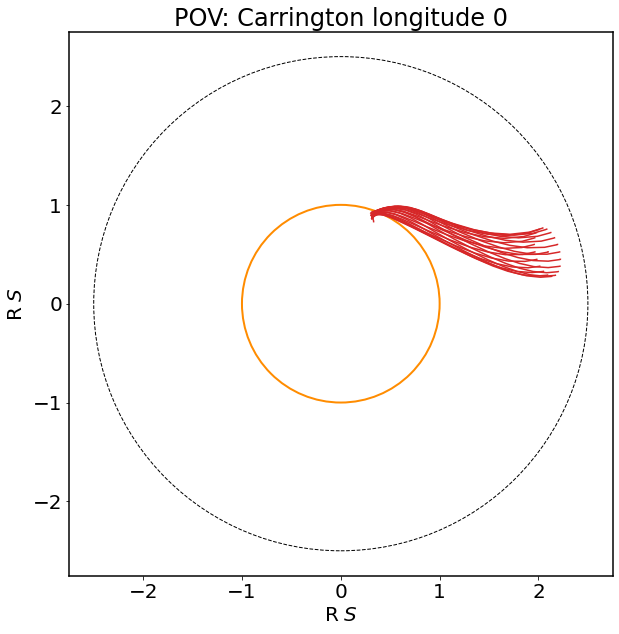

In [5]:
#The preceding cell returns all the traced sub-pfss field lines, and this function plots them
#as either xy, xz or yz projection

projection = 'yz'

#-----------------------------------------------------------
draw_fieldlines(flines, frame=projection)

# Inspect sub-pfss field lines in 3d mode

<IPython.core.display.Javascript object>


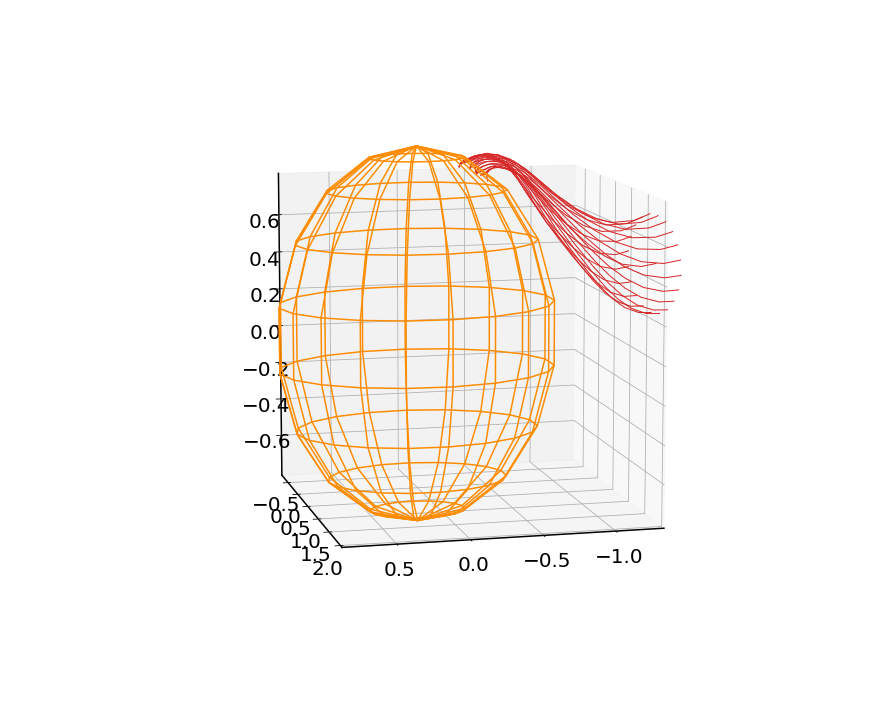

In [7]:
%matplotlib notebook
plot3d(flines)

In [8]:
%matplotlib inline
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 20
plt.rcParams['agg.path.chunksize'] = 20000

# field_line_accuracy() calculates the central point (the mean of all points) for photospheric footpoints, the average distance from the central point and the standard deviation of longitudes and latitudes

In [9]:
footpoint_coords, central_point, avg_distance, stds = field_line_accuracy(flines)
print(central_point)
print(avg_distance)
print(stds)

[134.53836575175026, 62.54512044973093]
0.06635774646066975
[6.677150329323653, 2.7391317483101525]


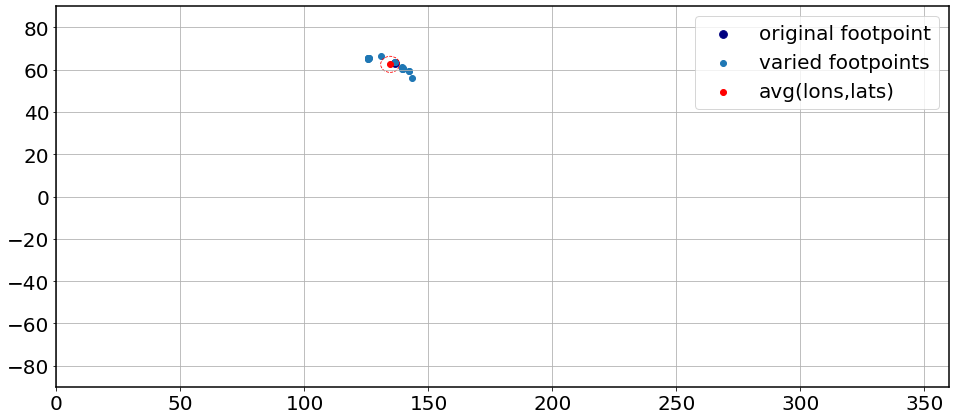

In [10]:
map_on_surface(footpoint_coords,central_point,avg_distance, 
               shift=None, zoom=None, show_avg_d=True)